In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [47]:
df_train = pd.read_csv('data/train_solution_bounding_boxes (1).csv')
df_sub = pd.read_csv('data/sample_submission.csv')

In [48]:
df_train.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [49]:
df_sub.head()

,image,bounds
0,vid_5_26560.jpg,0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0
1,vid_5_26580.jpg,0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0
2,vid_5_26600.jpg,0.0 0.0 1.0 1.0
3,vid_5_26620.jpg,0.0 0.0 1.0 1.0
4,vid_5_26640.jpg,0.0 0.0 1.0 1.0


In [50]:
os.listdir('data/training_images/')

['vid_4_1000.jpg',
 'vid_4_10000.jpg',
 'vid_4_10020.jpg',
 'vid_4_10040.jpg',
 'vid_4_10060.jpg',
 'vid_4_10080.jpg',
 'vid_4_10100.jpg',
 'vid_4_10120.jpg',
 'vid_4_10140.jpg',
 'vid_4_10160.jpg',
 'vid_4_10180.jpg',
 'vid_4_1020.jpg',
 'vid_4_10200.jpg',
 'vid_4_10220.jpg',
 'vid_4_10240.jpg',
 'vid_4_10260.jpg',
 'vid_4_10280.jpg',
 'vid_4_10300.jpg',
 'vid_4_10320.jpg',
 'vid_4_10340.jpg',
 'vid_4_10360.jpg',
 'vid_4_10380.jpg',
 'vid_4_1040.jpg',
 'vid_4_10400.jpg',
 'vid_4_10420.jpg',
 'vid_4_10440.jpg',
 'vid_4_10460.jpg',
 'vid_4_10480.jpg',
 'vid_4_10500.jpg',
 'vid_4_10520.jpg',
 'vid_4_10540.jpg',
 'vid_4_10560.jpg',
 'vid_4_10580.jpg',
 'vid_4_1060.jpg',
 'vid_4_10600.jpg',
 'vid_4_10620.jpg',
 'vid_4_10640.jpg',
 'vid_4_10660.jpg',
 'vid_4_10680.jpg',
 'vid_4_10700.jpg',
 'vid_4_10720.jpg',
 'vid_4_10740.jpg',
 'vid_4_10760.jpg',
 'vid_4_10780.jpg',
 'vid_4_1080.jpg',
 'vid_4_10800.jpg',
 'vid_4_10820.jpg',
 'vid_4_10840.jpg',
 'vid_4_10860.jpg',
 'vid_4_10880.jpg',
 'vid

In [51]:
temp_img = mpimg.imread('data/training_images/vid_4_10040.jpg')

In [52]:
temp_img.shape

(380, 676, 3)

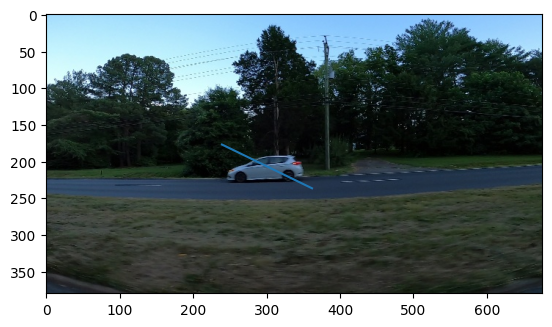

In [53]:
plt.imshow(temp_img)
plt.plot([239.192475, 361.968162], [176.764801,	236.430180])

In [54]:
X = []
y = []

for i in range(len(df_train)):
    img_name = df_train.iloc[i]['image']
    img_path = os.path.join('data/training_images/', img_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(380, 676, 1)
        img = img / 255
        X.append(img)

        xmin = float(df_train.iloc[i]['xmin'])
        ymin = float(df_train.iloc[i]['ymin'])
        xmax = float(df_train.iloc[i]['xmax'])
        ymax = float(df_train.iloc[i]['ymax'])

        y.append([xmin, ymin, xmax, ymax])

In [55]:
X = np.array(X)
y = np.array(y)

In [56]:
len(df_train)

559

In [57]:
len(X)

559

In [58]:
len(y)

559

In [59]:
X.shape

(559, 380, 676, 1)

In [60]:
y.shape

(559, 4)

In [61]:
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

In [72]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(380, 676, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='linear'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 378, 674, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 378, 674, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 189, 337, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 187, 335, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 187, 335, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 93, 167, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 91, 165, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 91, 165, 128)        │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 45, 82, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 472320)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │     120,914,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,041,156 (461.74 MB)

 Trainable params: 121,040,708 (461.73 MB)

 Non-trainable params: 448 (1.75 KB)

In [76]:
model.fit(X, y, validation_split=0.2,  epochs=50)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 300s 22s/step - loss: 77.3291 - mae: 77.3291 - val_loss: 123.7382 - val_mae: 123.7382
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 301s 22s/step - loss: 72.9131 - mae: 72.9131 - val_loss: 123.2645 - val_mae: 123.2645
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 302s 22s/step - loss: 80.4981 - mae: 80.4981 - val_loss: 127.9521 - val_mae: 127.9521
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 278s 20s/step - loss: 76.4608 - mae: 76.4608 - val_loss: 123.4880 - val_mae: 123.4880
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 276s 20s/step - loss: 74.2901 - mae: 74.2901 - val_loss: 132.8904 - val_mae: 132.8904
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 272s 19s/step - loss: 78.2869 - mae: 78.2869 - val_loss: 137.7285 - val_mae: 137.7285
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 274s 20s/step - loss: 76.8171 - mae: 76.8171 - val_loss: 133.1292 - val_mae: 133.1292
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 272s 19s/step - loss: 71.5139 - mae: 71.5139 - val_loss: 133.1861 - val_mae: 133.1861
Epoch 9/

KeyboardInterrupt: 

In [77]:
preds = model.predict(X)

18/18 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step


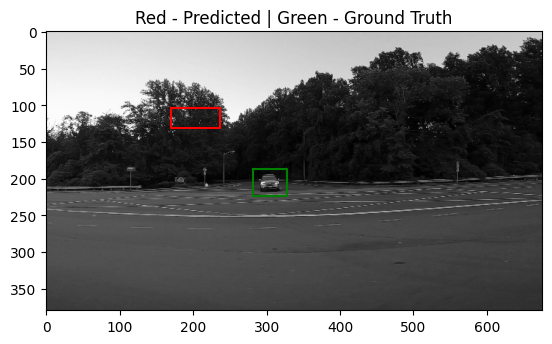

In [78]:
index = 0
img = X[index].reshape(380, 676)  
pred_box = preds[index]
true_box = y[index]
plt.imshow(img, cmap='gray')

plt.plot([pred_box[0], pred_box[2], pred_box[2], pred_box[0], pred_box[0]],
         [pred_box[1], pred_box[1], pred_box[3], pred_box[3], pred_box[1]], 'r')

plt.plot([true_box[0], true_box[2], true_box[2], true_box[0], true_box[0]],
         [true_box[1], true_box[1], true_box[3], true_box[3], true_box[1]], 'g')

plt.title('Red - Predicted | Green - Ground Truth')
plt.show()

In [80]:
test_folder = 'data/testing_images/'
test_files = sorted(os.listdir(test_folder))

In [81]:
results = []

for file in test_files:
    path = os.path.join(test_folder, file)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (676, 380))             
    img_input = img.reshape(1, 380, 676, 1) / 255.0
    pred_box = model.predict(img_input)[0]  
    results.append({'image': file, 'xmin': float(pred_box[0]), 'ymin': float(pred_box[1]), 'xmax': float(pred_box[2]), 'ymax': float(pred_box[3])})

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [88]:
test_image_path = 'data/testing_images/vid_5_26920.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


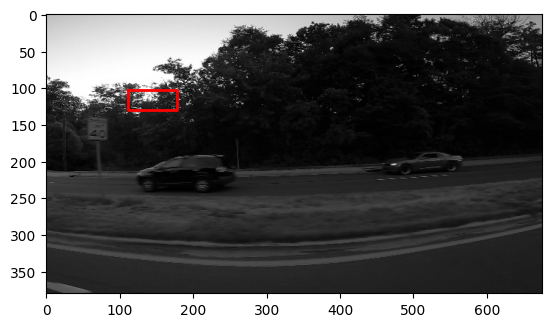

In [89]:
img = cv2.imread(test_image_path)
if img is None:
    print(f'Could not load image: {test_image_path}')
else:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (676, 380))
    img_input = img_resized.reshape(1, 380, 676, 1) / 255.0
    pred_box = model.predict(img_input)[0]
    import matplotlib.pyplot as plt
    plt.imshow(img_resized, cmap='gray')
    plt.plot(
        [pred_box[0], pred_box[2], pred_box[2], pred_box[0], pred_box[0]],
        [pred_box[1], pred_box[1], pred_box[3], pred_box[3], pred_box[1]],
        'r', linewidth=2)
    plt.show()

In [91]:
df_pred = pd.DataFrame(results)
df_pred.to_csv("test_predictions.csv", index=False)